In [ ]:


import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt





In [48]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')


In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data = np.array(data)
r, c = data.shape
np.random.shuffle(data) # shuffle before splitting into validation and training sets

data_validation = data[0:1000].T
Y_val = data_validation[0]
X_val = data_validation[1:c]
X_val = X_val / 255.

data_train = data[1000:r].T
Y_train = data_train[0]
X_train = data_train[1:c]
X_train = X_train / 255.
_,c_train = X_train.shape

In [16]:
test = np.array(test)


array([1, 1, 5, ..., 0, 3, 5])

In [17]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [18]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [79]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def ReLU_deriv(Z):
    return Z > 0



In [33]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / r * dZ2.dot(A1.T)
    db2 = 1 / r * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / r * dZ1.dot(X.T)
    db1 = 1 / r * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [80]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)


        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [78]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 800)

Iteration:  0
[7 7 5 ... 5 3 5] [1 1 5 ... 0 3 5]
0.08180487804878049
Iteration:  50
[0 1 4 ... 6 3 0] [1 1 5 ... 0 3 5]
0.4405121951219512
Iteration:  100
[0 1 0 ... 4 3 0] [1 1 5 ... 0 3 5]
0.6091219512195122
Iteration:  150
[1 1 0 ... 4 3 0] [1 1 5 ... 0 3 5]
0.692390243902439
Iteration:  200
[1 1 8 ... 5 3 0] [1 1 5 ... 0 3 5]
0.7336341463414634
Iteration:  250
[1 1 8 ... 5 3 0] [1 1 5 ... 0 3 5]
0.7598292682926829
Iteration:  300
[1 1 8 ... 5 3 0] [1 1 5 ... 0 3 5]
0.7798780487804878
Iteration:  350
[1 1 8 ... 5 3 0] [1 1 5 ... 0 3 5]
0.7980243902439025
Iteration:  400
[1 1 8 ... 5 3 0] [1 1 5 ... 0 3 5]
0.8126341463414634
Iteration:  450
[1 1 8 ... 5 3 0] [1 1 5 ... 0 3 5]
0.8237073170731707
Iteration:  500
[1 1 8 ... 0 3 0] [1 1 5 ... 0 3 5]
0.8329268292682926
Iteration:  550
[1 1 8 ... 0 3 0] [1 1 5 ... 0 3 5]
0.8408780487804878
Iteration:  600
[1 1 8 ... 0 3 0] [1 1 5 ... 0 3 5]
0.8466341463414634
Iteration:  650
[1 1 8 ... 0 3 0] [1 1 5 ... 0 3 5]
0.8517073170731707
Iteration

In [81]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def val_prediction(index, W1, b1, W2, b2):
    current_image = X_val[:, index, None]
    prediction = make_predictions(X_val[:, index, None], W1, b1, W2, b2)
    label = Y_val[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


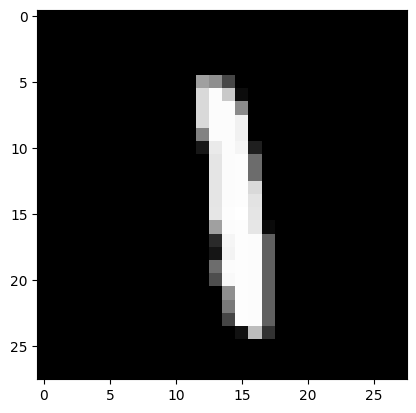

In [46]:
val_prediction(69, W1, b1, W2, b2)